# 시각화 실습

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config lnlineBackend.figure_formate = 'retina'

plt.rc("font", family="Malgun Gothic") 
plt.rc("axes", unicode_minus=False)

import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import seaborn as sns

# 문제2. 
- 2013년9월부터 2015년8월까지 데이터는 df_first 변수에 담아 탐색
- 이후 데이터는 df_last 변수에 담아 탐색

In [162]:
df_last = pd.read_csv('data/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210215.csv',
                     encoding='cp949')
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [117]:
df_first = pd.read_csv('data/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',
                     encoding='cp949')
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


# 문제3. df_last의 데이터 결측치를 확인하고 대체할지 고민한다.

In [118]:
df_last.isna().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    430
dtype: int64

# 문제4. df_last 데이터셋에 평당분양가격 컬럼을 추가한다.

In [122]:
df_last['분양가격(㎡)'] = pd.to_numeric(df_last['분양가격(㎡)'], errors='coerce')

In [123]:
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    522
dtype: int64

In [124]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,모든면적,2015,10,5841.0
1,서울,전용면적 60㎡이하,2015,10,5652.0
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0
4,서울,전용면적 102㎡초과,2015,10,5879.0


In [125]:
df_last['평당분양가격'] = df_last['분양가격(㎡)'] * 3.3

# 문제5. df_last 데이터셋에서 전용면적 컬럼을 추가한다(아래와 같이 규모구분 컬럼을 이용한다)

In [126]:
df_last['전용면적']=df_last['규모구분'].str.replace('전용면적','')
df_last['전용면적']=df_last['전용면적'].str.replace('초과','')
df_last['전용면적']=df_last['전용면적'].str.replace('이하','')
df_last['전용면적']=df_last['전용면적'].str.replace('','').str.strip()
df_last['전용면적']

0           모든면적
1            60㎡
2        60㎡ 85㎡
3       85㎡ 102㎡
4           102㎡
          ...   
5435        모든면적
5436         60㎡
5437     60㎡ 85㎡
5438    85㎡ 102㎡
5439        102㎡
Name: 전용면적, Length: 5440, dtype: object

# 문제 6. 메모리 사용량을 줄이기 위해 사용하지 않을 컬럼은 제거한 후(df_last.drop([‘규모구분’,’분양가격((㎡)’], axis=1 이용), 메모리 사용량을 전후로 확인한다.

In [127]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      5440 non-null   object 
 1   규모구분     5440 non-null   object 
 2   연도       5440 non-null   int64  
 3   월        5440 non-null   int64  
 4   분양가격(㎡)  4918 non-null   float64
 5   평당분양가격   4918 non-null   float64
 6   전용면적     5440 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 297.6+ KB


In [128]:
df_last = df_last.drop(['규모구분','분양가격(㎡)'], axis=1)
df_last.head()

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,모든면적
1,서울,2015,10,18651.6,60㎡
2,서울,2015,10,19410.6,60㎡ 85㎡
3,서울,2015,10,18879.3,85㎡ 102㎡
4,서울,2015,10,19400.7,102㎡


In [129]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     5440 non-null   object 
 1   연도      5440 non-null   int64  
 2   월       5440 non-null   int64  
 3   평당분양가격  4918 non-null   float64
 4   전용면적    5440 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 212.6+ KB


# 문제7. GroupBy(unstack()함수 이용) vs. pivot_table

In [130]:
#groupBy 이용
df_last.groupby(['지역명']).count()

,연도,월,평당분양가격,전용면적
지역명,,,,
강원,320,320,303,320
경기,320,320,315,320
경남,320,320,306,320
경북,320,320,294,320
광주,320,320,262,320
대구,320,320,307,320
대전,320,320,239,320
부산,320,320,315,320
서울,320,320,315,320


In [131]:
df_last.groupby(['지역명'])['평당분양가격'].mean()

지역명
강원     8390.571287
경기    13713.354286
경남     9589.627451
경북     8690.617347
광주    10756.677481
대구    12691.950489
대전    10412.425105
부산    12351.711429
서울    24867.846667
세종     9975.354231
울산    10736.290355
인천    12566.219614
전남     7961.468932
전북     7896.046006
제주    11743.878161
충남     8414.014430
충북     7786.956230
Name: 평당분양가격, dtype: float64

In [132]:
df_last.groupby(['전용면적'])['평당분양가격'].mean()

전용면적
102㎡        11987.947280
60㎡         10802.735170
60㎡ 85㎡     10694.895726
85㎡ 102㎡    11733.047719
모든면적        10702.628125
Name: 평당분양가격, dtype: float64

In [133]:
df_last.groupby(['지역명','전용면적'])['평당분양가격'].mean()

지역명  전용면적    
강원   102㎡        9367.547619
     60㎡         8054.357143
     60㎡ 85㎡     7854.523810
     85㎡ 102㎡    8896.476471
     모든면적        7876.314286
                    ...     
충북   102㎡        8383.466667
     60㎡         7294.152381
     60㎡ 85㎡     7416.619048
     85㎡ 102㎡    8481.757377
     모든면적        7380.842857
Name: 평당분양가격, Length: 85, dtype: float64

In [134]:
df_last.groupby(["연도", "지역명"])["평당분양가격"].mean().unstack().T

연도,2015,2016,2017,2018,2019,2020,2021
지역명,,,,,,,
강원,7188.060,7162.903846,7273.560000,8219.255000,8934.475000,10302.423214,11169.18
경기,11060.940,11684.970000,12304.980000,14258.420000,15665.540000,15106.080000,14823.60
경남,8459.220,8496.730000,8786.760000,9327.670000,10697.615789,10919.272222,11079.42
경북,7464.160,7753.405000,8280.800000,8680.776923,9050.250000,9997.693750,11281.38
광주,7916.700,9190.683333,9613.977551,9526.953333,12111.675000,13406.485714,13445.52
대구,9018.900,10282.030000,12206.700000,12139.252632,14081.650000,15314.200000,15640.02
대전,8190.600,8910.733333,9957.158491,10234.106667,12619.200000,11238.844737,10444.50
부산,10377.400,10743.535000,11560.680000,12889.965000,13537.865000,13353.010000,13565.64
서울,20315.680,21753.435000,21831.060000,23202.245000,28286.830000,29781.015000,29303.34


# 문제8. 위의 그룹화한 내용을 선그래프와 막대그래프로 시각화

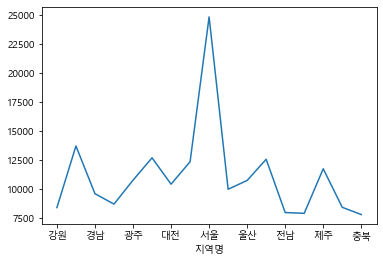

In [135]:
df_last.groupby(["지역명"])["평당분양가격"].mean().plot()
plt.show()

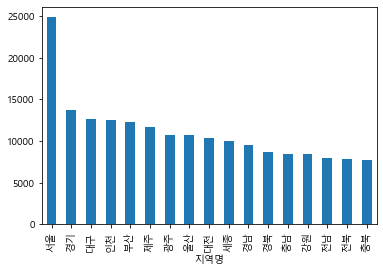

In [136]:
df_last.groupby(['지역명'])['평당분양가격'].mean().sort_values(ascending=False).plot.bar()
plt.show()

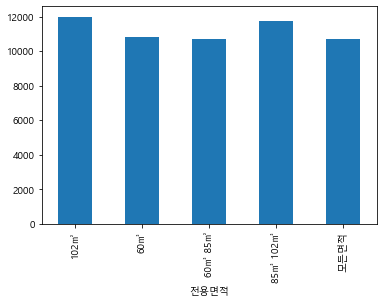

In [137]:
df_last.groupby(['전용면적'])['평당분양가격'].mean().plot.bar()
plt.show()

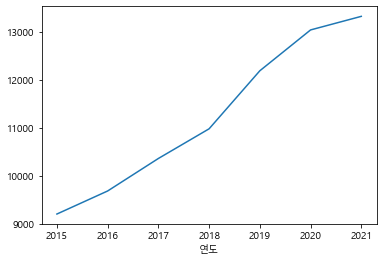

In [138]:
df_last.groupby(['연도'])['평당분양가격'].mean().plot()
plt.show()

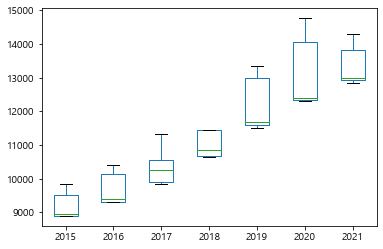

In [139]:
df_last.groupby(["연도",'전용면적'])["평당분양가격"].mean().unstack().T.plot.box()
plt.show()

# 문제9. seaborn으로 시각화(위에서 그린 시각화내용을 일부또는 그 이상을 seaborn으로 시각화

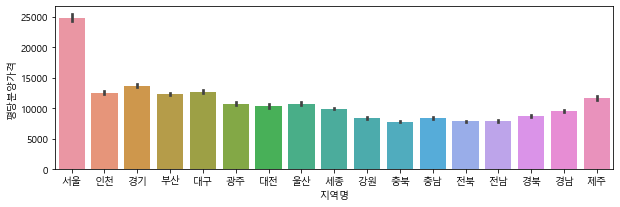

In [140]:
plt.figure(figsize=(10,3))
sns.barplot(data=df_last, x="지역명",y="평당분양가격")
plt.show()

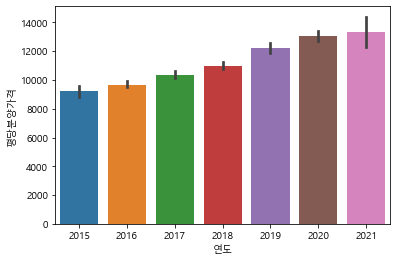

In [141]:
sns.barplot(x="연도", y="평당분양가격", data=df_last)
plt.show()

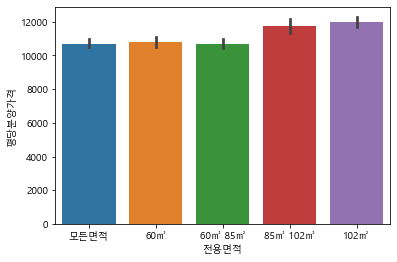

In [142]:
sns.barplot(x="전용면적", y="평당분양가격", data=df_last)
plt.show()

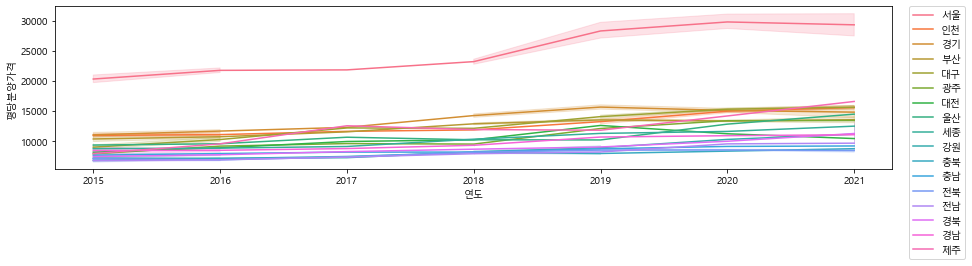

In [143]:
plt.figure(figsize=(15,3))
sns.lineplot(data=df_last, x="연도", y="평당분양가격",
             hue='지역명')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

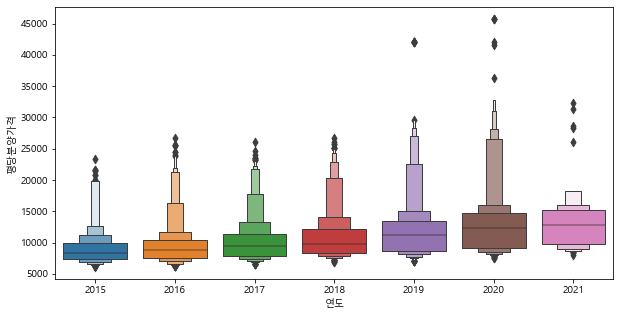

In [144]:
plt.figure(figsize=(10,5))
sns.boxenplot(x='연도', y='평당분양가격', data=df_last)

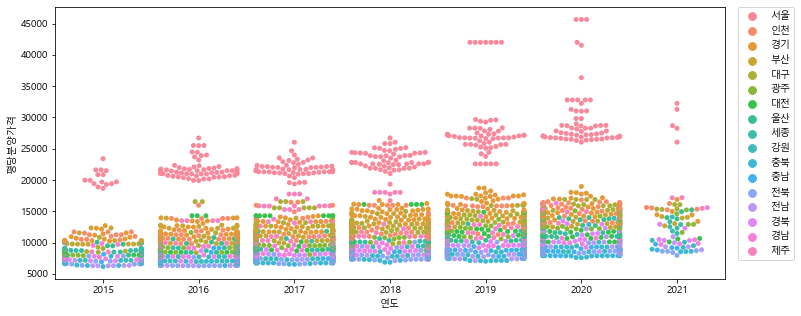

In [145]:
plt.figure(figsize=(12, 5))
sns.swarmplot(data=df_last, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

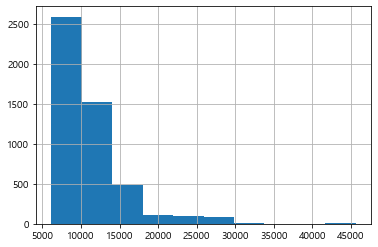

In [146]:
df_last["평당분양가격"].hist(bins=10)
plt.show()

# 문제10. 구조가 다른 df_first와 df_last의 전용면적 전체의 데이터를 하나의 같은 데이터 셋으로 합쳐서 분석을 한다. 분석은 위의 내용을 참조하여 각자 분석한다.

In [165]:
df_last["연도"] = df_last["연도"].astype('str')

In [166]:
df_last["월"] = df_last["월"].astype('str')

In [167]:
df_last["분양가격(㎡)"] = pd.to_numeric(df_last["분양가격(㎡)"], errors="coerce")

In [168]:
df_last["평당분양가격"] = df_last["분양가격(㎡)"] * 3.3

In [169]:
df_last["연도월"] = df_last["연도"] + "년" +  df_last["월"] +"월"
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격,연도월
0,서울,모든면적,2015,10,5841.0,19275.3,2015년10월
1,서울,전용면적 60㎡이하,2015,10,5652.0,18651.6,2015년10월
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,19410.6,2015년10월
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,18879.3,2015년10월
4,서울,전용면적 102㎡초과,2015,10,5879.0,19400.7,2015년10월


In [186]:
new_last = df_last.loc[df_last["규모구분"]=='모든면적', 
                       ['지역명', '연도','월','평당분양가격']]
new_last.tail()

,지역명,연도,월,평당분양가격
5415,전북,2021,1,8708.7
5420,전남,2021,1,9329.1
5425,경북,2021,1,10345.5
5430,경남,2021,1,9860.4
5435,제주,2021,1,17156.7


In [187]:
new_first = df_first.melt(id_vars="지역", 
                          var_name="연도월", 
                          value_name="평당분양가격")
new_first.head()

,지역,연도월,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [188]:
new_first.columns = ['지역명', '연도월', '평당분양가격']
new_first.head()

,지역명,연도월,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [176]:
date = '2013년12월'
def sep_year(date):
    year = date.split("년")[0] 
    year = int(year) 
    return year

sep_year(date)

2013

In [177]:
def sep_month(date):
    month = date.split("년")[-1].replace("월","")
    month = int(month)
    return month

sep_month(date)

12

In [189]:
new_first["연도"] = new_first["연도월"].apply(sep_year)
new_first.head()

,지역명,연도월,평당분양가격,연도
0,서울,2013년12월,18189,2013
1,부산,2013년12월,8111,2013
2,대구,2013년12월,8080,2013
3,인천,2013년12월,10204,2013
4,광주,2013년12월,6098,2013


In [191]:
new_first["월"] = new_first["연도월"].apply(sep_month)
new_first.head()

,지역명,연도월,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12


In [192]:
cols = ['지역명', '연도', '월', '평당분양가격'] 
cols

new_first = new_first[cols]
new_first

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189
1,부산,2013,12,8111
2,대구,2013,12,8080
3,인천,2013,12,10204
4,광주,2013,12,6098
...,...,...,...,...
352,전북,2015,8,6580
353,전남,2015,8,6289
354,경북,2015,8,7037
355,경남,2015,8,7665


In [193]:
df_new = pd.concat([new_first,new_last])
df_new.tail()

,지역명,연도,월,평당분양가격
5415,전북,2021,1,8708.7
5420,전남,2021,1,9329.1
5425,경북,2021,1,10345.5
5430,경남,2021,1,9860.4
5435,제주,2021,1,17156.7


In [194]:
df_new.isna().sum()

지역명        0
연도         0
월          0
평당분양가격    32
dtype: int64

In [195]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 5435
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     1445 non-null   object 
 1   연도      1445 non-null   object 
 2   월       1445 non-null   object 
 3   평당분양가격  1413 non-null   float64
dtypes: float64(1), object(3)
memory usage: 56.4+ KB


In [196]:
df_new.groupby(['지역명']).count()

,연도,월,평당분양가격
지역명,,,
강원,85,85,84
경기,85,85,84
경남,85,85,84
경북,85,85,84
광주,85,85,84
대구,85,85,84
대전,85,85,84
부산,85,85,84
서울,85,85,84


In [212]:
h = df_new.groupby(["연도","지역명"])["평당분양가격"].mean().unstack().round()
h

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6708.0,10531.0,7669.0,6984.0,7920.0,8510.0,8107.0,9381.0,19117.0,8600.0,8981.0,10199.0,6031.0,6593.0,7488.0,6991.0,6720.0
2015,7160.0,10377.0,7586.0,7171.0,8052.0,9232.0,8098.0,10307.0,19725.0,8750.0,10053.0,10484.0,6317.0,6703.0,7405.0,7115.0,6645.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0
2020,9331.0,14383.0,10161.0,9545.0,12500.0,15145.0,11094.0,13248.0,26910.0,11355.0,12203.0,14674.0,8697.0,8317.0,14541.0,8856.0,7960.0


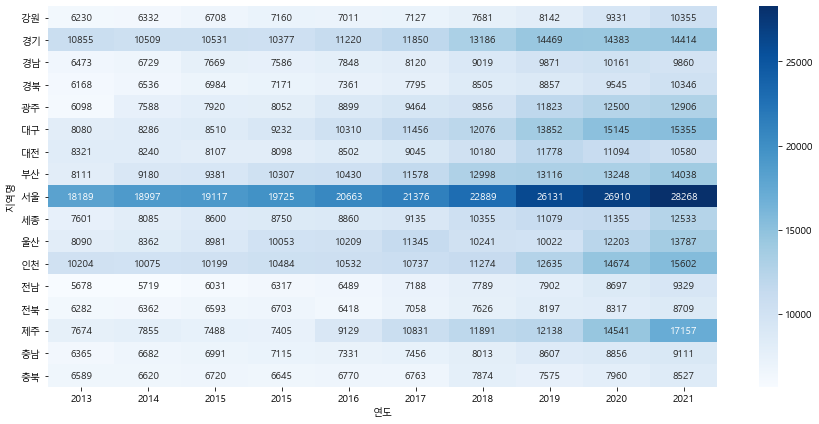

In [217]:
plt.figure(figsize=(15,7))
sns.heatmap(h.T, annot=True, fmt=".0f", cmap="Blues")
plt.yticks(rotation=0)
plt.show()

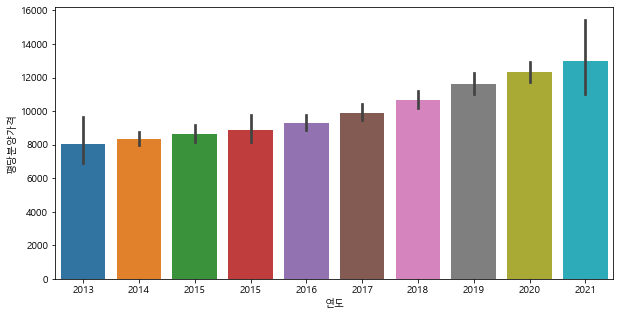

<Figure size 432x288 with 0 Axes>

In [218]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_new, x="연도",y="평당분양가격")
plt.show()
plt.savefig('EX1(bar).png')

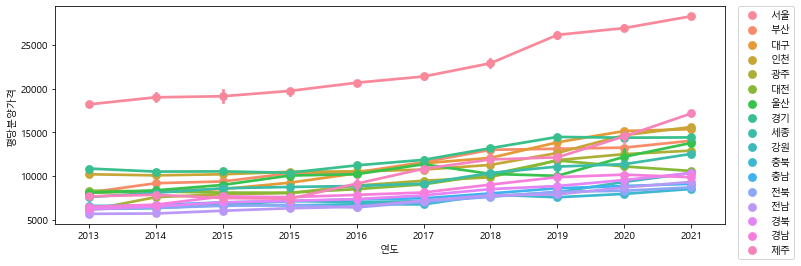

<Figure size 432x288 with 0 Axes>

In [219]:
plt.figure(figsize=(12,4))
sns.pointplot(data=df_new, x="연도",y="평당분양가격",hue="지역명")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()
plt.savefig('EX2(line).png')

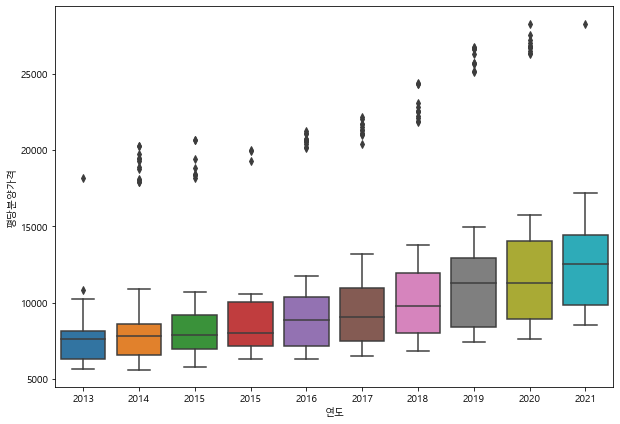

<Figure size 432x288 with 0 Axes>

In [199]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df_new, x="연도",y="평당분양가격")
plt.show()
plt.savefig('EX3(boxplot).png')

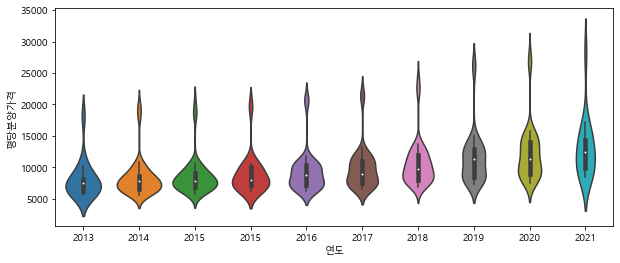

<Figure size 432x288 with 0 Axes>

In [202]:
plt.figure(figsize=(10, 4))
sns.violinplot(data=df_new, x="연도",y="평당분양가격")
plt.show()
plt.savefig('EX4(violinplot).png')

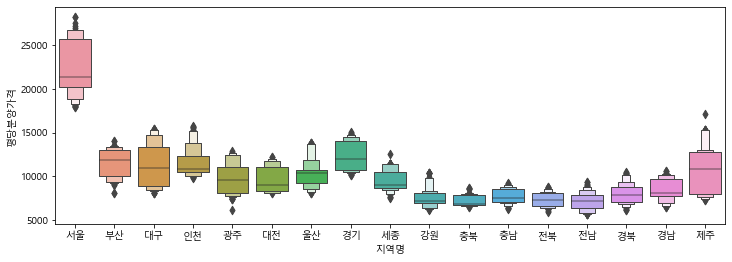

<Figure size 432x288 with 0 Axes>

In [203]:
plt.figure(figsize=(12, 4))
sns.boxenplot(data=df_new, x="지역명", y="평당분양가격")
plt.show()
plt.savefig('EX5(boxnplot).png')

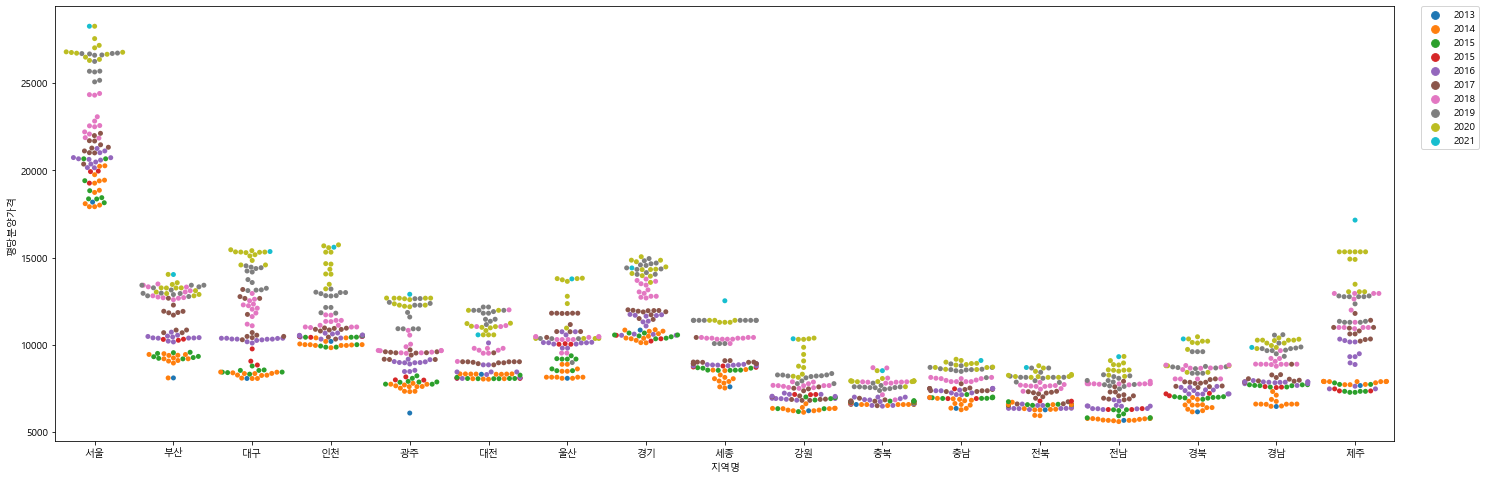

<Figure size 432x288 with 0 Axes>

In [205]:
plt.figure(figsize=(24, 8))
sns.swarmplot(data=df_new, x="지역명", y="평당분양가격", hue="연도")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()
plt.savefig('EX6(swarmplot).png')